In [1]:
import numpy as np 
import pandas as pd
import pickle 
import matplotlib.pyplot as plt
import os
from glob import glob 

In [2]:
path = r'C:\Users\juuuunsu\Drive\TNT\2021-2_TNT_Industrial_AI_JS\TASK2\LSWMD.pkl'
df = pd.read_pickle(path)

In [3]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [4]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [16]:
df['trianTestLabel'][len(df)-3].shape

(1, 1)

In [10]:
tmp = df['trianTestLabel'][0]
tmp

array([['Training']], dtype='<U8')

In [11]:
tmp.shape

(1, 1)

In [12]:
print("".join(tmp[0]))

Training


In [13]:
tmp = df['trianTestLabel'][len(df)-2]
print(tmp.shape)


(0, 0)


In [14]:
#trainTestLabel
cnt=0
not_cnt = 0
for i in range(len(df)):
    if df['trianTestLabel'][i].shape == (1, 1):
        cnt+=1
    elif df['trianTestLabel'][i].shape == (0, 0):
        not_cnt+=1
        
assert(len(df) == cnt+not_cnt)
print(cnt)
print(not_cnt)

172950
638507


In [17]:
# failureType
cnt=0
not_cnt = 0
for i in range(len(df)):
    if df['failureType'][i].shape == (1, 1):
        cnt+=1
    elif df['failureType'][i].shape == (0, 0):
        not_cnt+=1
        
assert(len(df) == cnt+not_cnt)
print(cnt)
print(not_cnt)

172950
638507


In [18]:
def removebrackets(array):
    if array.shape == (1, 1):
        return "".join(array[0])
    elif array.shape == (0, 0):
        return None

In [21]:
df['trianTestLabel'] = df['trianTestLabel'].apply(removebrackets)

In [22]:
df['failureType'] = df['failureType'].apply(removebrackets)

In [37]:
df = df.dropna()

In [38]:
df.describe()

,dieSize,waferIndex
count,172950.000000,172950.000000
mean,1042.232374,13.004180
std,1032.572449,7.212674
min,3.000000,1.000000
25%,533.000000,7.000000
50%,776.000000,13.000000
75%,1250.000000,19.000000
max,22372.000000,25.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172950 entries, 0 to 811454
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        172950 non-null  object 
 1   dieSize         172950 non-null  float64
 2   lotName         172950 non-null  object 
 3   waferIndex      172950 non-null  float64
 4   trianTestLabel  172950 non-null  object 
 5   failureType     172950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.2+ MB


In [40]:
df.isnull().sum()

waferMap          0
dieSize           0
lotName           0
waferIndex        0
trianTestLabel    0
failureType       0
dtype: int64

In [41]:
df['dieSize'].unique()

array([1.6830e+03, 2.4600e+03, 5.3300e+02, 3.2980e+03, 1.9560e+03,
       1.0910e+03, 1.6200e+03, 1.8120e+03, 1.1810e+03, 1.1760e+03,
       3.7030e+03, 1.7240e+03, 1.4130e+03, 9.3800e+02, 1.3930e+03,
       3.7290e+03, 8.9900e+02, 5.2580e+03, 3.0020e+03, 2.9790e+03,
       2.9860e+03, 2.9620e+03, 2.9900e+03, 6.3500e+02, 2.9930e+03,
       2.9890e+03, 3.0010e+03, 3.0120e+03, 2.9950e+03, 1.3200e+03,
       1.3040e+03, 7.8740e+03, 1.7690e+03, 9.3900e+02, 1.5130e+03,
       1.0320e+03, 1.8060e+03, 1.3970e+03, 5.1400e+02, 5.2000e+02,
       6.9300e+02, 7.4100e+02, 9.0400e+02, 2.2680e+03, 8.4400e+02,
       7.7600e+02, 1.5220e+03, 8.4600e+02, 7.1200e+02, 3.0360e+03,
       9.2400e+02, 7.1000e+02, 1.0750e+03, 3.9270e+03, 5.1500e+02,
       6.2950e+03, 1.3490e+03, 6.0000e+02, 6.7400e+02, 1.2530e+03,
       6.0650e+03, 1.9770e+03, 3.0040e+03, 1.8010e+03, 3.0310e+03,
       3.0300e+03, 5.3420e+03, 2.3930e+03, 6.0700e+02, 9.8600e+02,
       1.6230e+03, 3.8790e+03, 5.0850e+03, 2.2270e+03, 1.7990e

In [42]:
df['lotName'].unique()

array(['lot1', 'lot2', 'lot3', ..., 'lot47540', 'lot47541', 'lot47542'],
      dtype=object)

In [43]:
df['waferIndex'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [44]:
df['trianTestLabel'].unique()

array(['Training', 'Test'], dtype=object)

In [45]:
df['trianTestLabel'].value_counts()
# training과 test 비율이 비정상적, 4:1 비율로 다시 정해주는게 필요할듯

Test        118595
Training     54355
Name: trianTestLabel, dtype: int64

In [72]:
df['failureType'].unique()

array(['none', 'Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch',
       'Random', 'Near-full', 'Donut'], dtype=object)

In [46]:
df['failureType'].value_counts()
# training과 test데이터에만 결함 타입이 적혀져 있음.

none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: failureType, dtype: int64

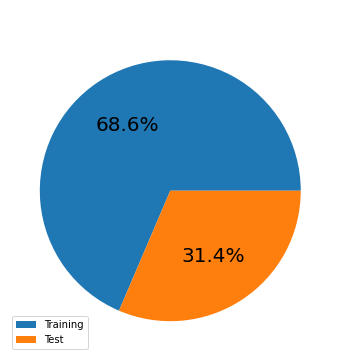

In [68]:
# trainTestLabel

plt.figure(figsize=(6, 6))
labels = df['trianTestLabel'].unique()
counts = df['trianTestLabel'].value_counts()

pie = plt.pie(x = counts, labels=labels, autopct = "%.1f%%")
_, texts, autotexts =pie
for items in texts:
    items.set_color('white') 
    items.set_fontsize('20')
for items in autotexts:
    items.set_fontsize('20')
plt.title('trainTestLabel', color = 'white', fontsize = 20)
plt.legend()
plt.show()

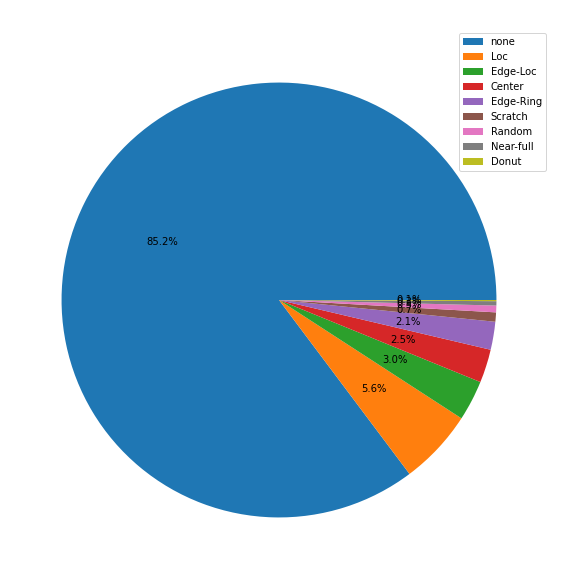

In [71]:
# failureType

plt.figure(figsize=(10, 10))
labels = df['failureType'].unique()
counts = df['failureType'].value_counts()

pie = plt.pie(x = counts, labels=labels, autopct = "%.1f%%")
_, texts, autotexts =pie
for items in texts:
    items.set_color('white') 
    items.set_fontsize('10')
for items in autotexts:
    items.set_fontsize('10')
plt.title('failureType', color = 'white', fontsize = 20)
plt.legend()
plt.show()

# Loc, Edge-loc에 비해 Near-full, Donut들의 인스턴스 개수가 매우 작음.

# EDA for Wafermap

In [73]:
labels = df['failureType'].unique()
labels

array(['none', 'Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch',
       'Random', 'Near-full', 'Donut'], dtype=object)

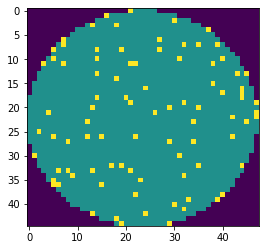

In [89]:
tmp = plt.imshow(df['waferMap'][0])

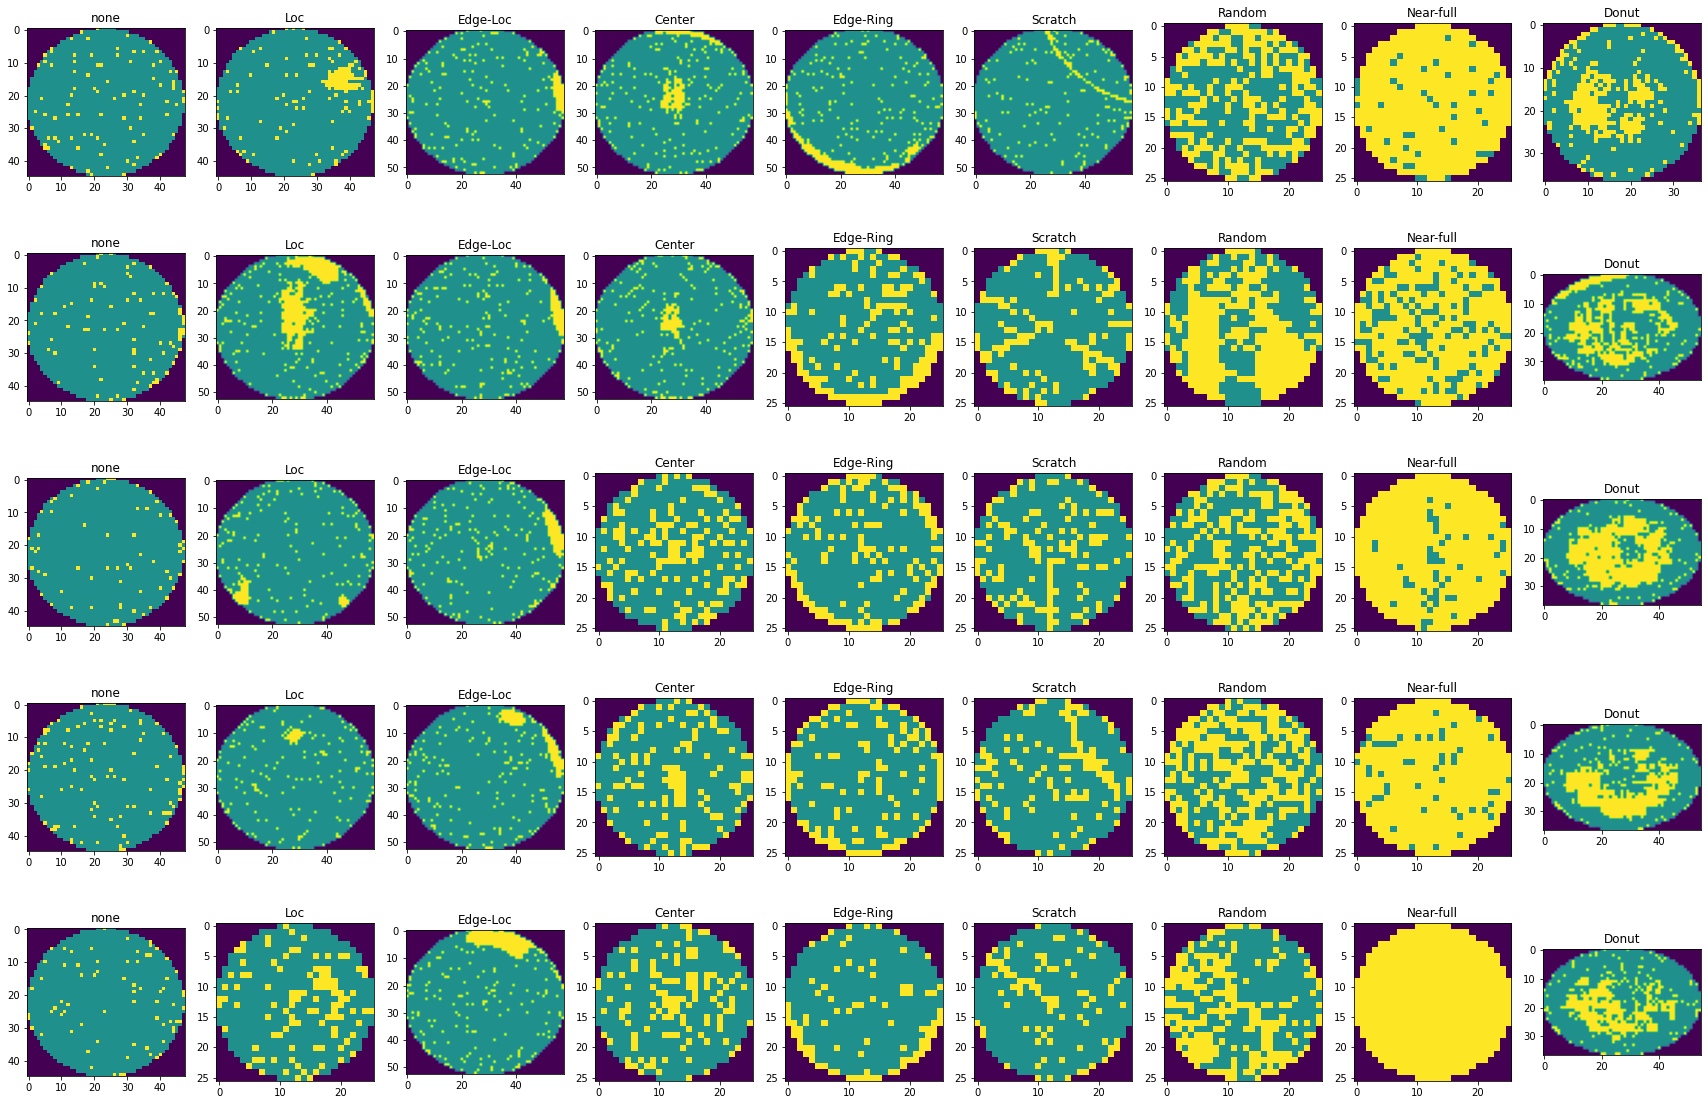

In [115]:
labels = df['failureType'].unique()
rows = 5
cols = len(labels) # 10 
n = rows*cols

fig, axes = plt.subplots(rows, cols, figsize=(30, 20))

for col in range(cols):
      df2 = df[df['failureType'] == labels[col]]['waferMap']
      for row, wafermap in enumerate(df2[:rows]):
            ax = axes[row][col]
            ax.set_title(labels[col])
            ax.imshow(wafermap)

plt.show()